# 作业四：朴素贝叶斯分类器
- 姓名：韩佳迅
- 学号：2012682
- 专业：计算机科学与技术

### 实验要求
题目：朴素贝叶斯分类器

#### 基本要求：
a) 采用分层采样的方式将数据集划分为训练集和测试集。 

b) 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

#### 中级要求

使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

#### 高级要求

在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。


**截止日期：11月18日**
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入相关包

In [207]:
# -*- coding: UTF-8 -*-
import math
import numpy as np  
import random
import pandas as pd

### 基本要求：
a) 采用分层采样的方式将数据集划分为训练集和测试集。 

b) 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

### 导入并划分数据集

In [208]:
f = open('wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
test_len = [round(len(types[i]) / 5) for i in range(3)]
data_num = sum([len(types[i]) for i in range(3)])

In [209]:
# 分层采样
def split_data():
    for i in range(3):  
        test_data[i] = random.sample(types[i], test_len[i]) #在每类里面按照测试集的大小随机选出测试集数据
        train_data[i] = [x for x in types[i] if x not in test_data[i] ] #剩下的就是训练集

In [210]:
def Bayes(data, p, mean, std):
    result = 1
    for i in range(len(data)):
        result *=  1 / ((2*math.pi)**0.5*std[i]) * math.exp(-((data[i] - mean[i])**2) / (2 * std[i]**2 ))
    result *= p
    return result

In [211]:
def bayes_classificate():
    # 首先，分别计算训练集上三个类的均值和标准差
    means=[np.mean(train_data[i],axis=0) for i in range(3)]#均值
    stds=[np.std(train_data[i],axis=0) for i in range(3)]#标准差
    real_label = []
    pre_label = []
    pre_P = [[],[],[]]
    wrong_num = 0
    for i in range(3):
        for t in test_data[i]:                  #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                #由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                temp = Bayes(t, len(types[j])/data_num, means[j], stds[j])
                my_type.append(temp)                        #这里将所有score保存
                pre_P[j].append(temp)#分别记录该样本预测为j的概率
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            pre_label.append(pre_type)#记录预测值
            real_label.append(i)#记录真实值
            if pre_type != i: #统计错误数
                wrong_num+=1
    return wrong_num,real_label,pre_label,pre_P

In [223]:
split_data() # 分层采样
wrong_num,real_label,pre_label,pre_P = bayes_classificate() # 朴素贝叶斯分类器，对测试集进行预测
acc = (sum(test_len)-wrong_num) / sum(test_len) # 计算分类准确率
print("错误分类数 =", wrong_num)
print("朴素贝叶斯分类准确率 =", acc)

错误分类数 = 2
朴素贝叶斯分类准确率 = 0.9444444444444444


### 中级要求

使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

In [225]:
def confusion_matrix():
    confusion = np.zeros((3, 3))
    for i in range(len(real_label)):
        confusion[int(real_label[i] - 1), int(pre_label[i] - 1)] += 1
    recall1 = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1] + confusion[0, 2])
    recall2 = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1] + confusion[1, 2])
    recall3 = confusion[2, 2] / (confusion[2, 0] + confusion[2, 1] + confusion[2, 2])
    precision1 = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0] + confusion[2, 0])
    precision2 = confusion[1, 1] / (confusion[0, 1] + confusion[1, 1] + confusion[2, 1])
    precision3 = confusion[2, 2] / (confusion[0, 2] + confusion[1, 2] + confusion[2, 2])
    f1 = 2 / (1 / precision1 + 1 / recall1)
    f2 = 2 / (1 / precision2 + 1 / recall2)
    f3 = 2 / (1 / precision3 + 1 / recall3)
    return confusion, precision1, precision2, precision3, recall1, recall2, recall3, f1, f2, f3

In [226]:
confusion, precision1, precision2, precision3, recall1, recall2, recall3, f1, f2, f3 = confusion_matrix()

print("混淆矩阵")
print(confusion)
print("类别1的精度: " + str(precision1) )
print("类别2的精度: " + str(precision2))
print("类别3的精度: " + str(precision3))

print("类别1的召回率: " + str(recall1) )
print("类别2的召回率: " + str(recall2))
print("类别3的召回率: " + str(recall3))

print("类别1的F值: " + str(f1) )
print("类别2的F值: " + str(f2))
print("类别3的F值: " + str(f3))

混淆矩阵
[[13.  1.  0.]
 [ 0. 10.  0.]
 [ 1.  0. 11.]]
类别1的精度: 0.9285714285714286
类别2的精度: 0.9090909090909091
类别3的精度: 1.0
类别1的召回率: 0.9285714285714286
类别2的召回率: 1.0
类别3的召回率: 0.9166666666666666
类别1的F值: 0.9285714285714286
类别2的F值: 0.9523809523809523
类别3的F值: 0.9565217391304348


### 高级要求

在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

In [231]:
def ROC_auc(predicts, labels):
    point=(0.0, 0.0)#当前节点（绘图）
    pos_num = np.sum(labels == 1) # positive个数
    neg_num = len(labels)-pos_num # negative个数
    auc = 0
    sortedIndicies = np.argsort(-predicts)#排序，返回排序后的下标

    fig = plt.figure()
    fig.clf()
    ySum = 0.0
    ax = plt.subplot(111)
    ax.plot([0, 1.1], [0, 1.1], 'k--')
    for index in sortedIndicies:
        if labels[index] == 1.0:
            # x、y的变化值（x不变，y上移）
            dy = 1.0/pos_num
            dx=0
        else:
            # x、y的变化值（y不变，x左移）
            dy = 0
            dx = 1.0/neg_num
            auc += point[1]*(1.0/neg_num)#auc值（积分值累加）
        ax.plot([point[0], point[0]+dx], [point[1], point[1]+dy], c='r')#绘制这一段的图像
        point = (point[0]+dx, point[1]+dy)#下一个点

    plt.xlabel('False Positve Rate')
    plt.ylabel('True Postive Rate')
    plt.title('ROC')
    ax.axis([0, 1.1, 0, 1.1])
    plt.show()
    print('auc:', auc)


===================类别一===================


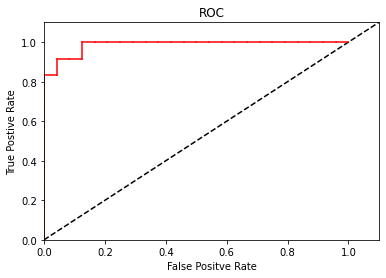

auc: 0.9861111111111108



===================类别二===================


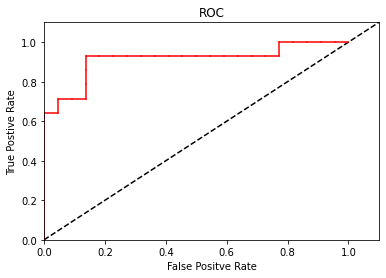

auc: 0.9123376623376618



===================类别三===================


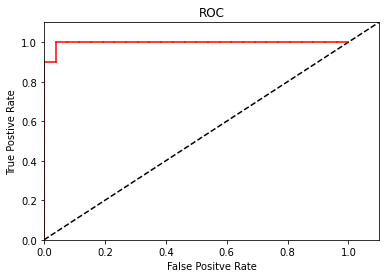

auc: 0.9961538461538457


In [232]:
real_0 = [1 if x==0 else 0 for x in real_label]
real_1 = [1 if x==1 else 0 for x in real_label]
real_2 = [1 if x==2 else 0 for x in real_label]


# 类别一的ROC、auc
print("\n===================类别一===================")
ROC_auc(np.array(pre_P[0]),np.array(real_0))

# 类别一的ROC、auc
print("\n\n\n===================类别二===================")
ROC_auc(np.array(pre_P[1]),np.array(real_1))

# 类别一的ROC、auc
print("\n\n\n===================类别三===================")
ROC_auc(np.array(pre_P[2]),np.array(real_2))